In [ ]:
from src.models.high_level_model import HighLevelModel
from src.data.multi_output_dataset import MultiOutputDataModule

import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [ ]:
TYPE_LABELS = [
    "sedan",
    "suv",
    "van",
    "hatchback",
    "mpv",
    "pickup",
    "bus",
    "truck",
    "estate",
    "sportscar",
    "RV",
]

COLOR_LABELS = [
    "yellow",
    "orange",
    "green",
    "gray",
    "red",
    "blue",
    "white",
    "golden",
    "brown",
    "black",
    "purple",
    "pink",
]

SGVEHICLE_CLASSES = [len(COLOR_LABELS), len(TYPE_LABELS)]

In [ ]:
model = HighLevelModel.load_from_checkpoint(
    "models/sgvehicle-high-level-model.ckpt",
    task_num_classes=SGVEHICLE_CLASSES,
    map_location="cpu",
)
model = model.eval()

/home/tmb2k01/.local/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=

In [ ]:
data = MultiOutputDataModule(
    root_dir="data/", batch_size=64, num_workers=0, task_num_classes=SGVEHICLE_CLASSES
)
data.setup()

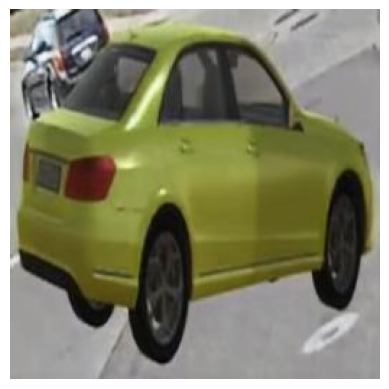

Predicted: yellow - Ground Truth color: yellow
Predicted: sedan - Ground Truth type: sedan



In [ ]:
for batch in data.val_dataloader():
    # Get the inputs
    x, y = batch[0], batch[1]

    # Forward pass
    with torch.no_grad():
        y_pred = model(x)

    # Plot the image
    plt.imshow(x[0].permute(1, 2, 0))
    plt.axis("off")
    plt.show()

    # Print the predicted and ground truth labels
    print(
        f"Predicted: {COLOR_LABELS[torch.argmax(y_pred[0][0]).item()]} - Ground Truth color: {COLOR_LABELS[y[0][0].item()]}"
    )
    print(
        f"Predicted: {TYPE_LABELS[torch.argmax(y_pred[1][0]).item()]} - Ground Truth type: {TYPE_LABELS[y[0][0].item()]}"
    )
    print()
    break

In [6]:
trainer = pl.Trainer(accelerator="gpu")
trainer.test(model, data)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/tmb2k01/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

Task 0 Accuracy: 0.82
Task 0 F1 Score: 0.81
Task 0 Confusion Matrix:
[[312   3   2   0   0   1   0  68   0   0   0   0]
 [  6 343   1   2   0   0   0  39   4   0   0   3]
 [  2   0 321  31   2  33   3   0   4  10   2   0]
 [  0   0  21 178   0  39  52   1  23  64   0   1]
 [  0   0   3   1 439   0   0   1   2   0   0   2]
 [  0   0   7  14   0 351  11   0   0   4   0   1]
 [  0   0   2  13   0   8 354   0   5   1   0  15]
 [ 93  41   0   2   0   1   0 220  14   1   0   1]
 [  0   2   0  17   1   1   8   7 310  34   0  14]
 [  0   0   6  52   0  28   0   0  16 305   2   1]
 [  0   0   1   0   0   0   0   0   1   0 422   3]
 [  0   1   3   0   4   0  19   1   4   0   0 371]]
Task 1 Accuracy: 0.83
Task 1 F1 Score: 0.83
Task 1 Confusion Matrix:
[[832  18   0 127   0   6   0   3  18  96   0]
 [ 17 409   2  50   0   8   0   2   8   6   2]
 [  1   1 204   9   4   0   3   9   0   0   2]
 [ 59  12   1 888   0   1   0   3  16  35   0]
 [  2   2   1   2  48   0   0   1   1   0   0]
 [ 20  10   0 

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric         ┃        DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ test_accuracy (High-level) │     0.8213840399002494     │
│ test_accuracy (Low-level)  │     0.677265170407315      │
│    test_task_0_accuracy    │     0.8158769607543945     │
│    test_task_0_conf_acc    │     0.815876974231089      │
│       test_task_0_f1       │     0.8130244487471509     │
│    test_task_1_accuracy    │     0.8268911242485046     │
│    test_task_1_conf_acc    │     0.8268911055694098     │
│       test_task_1_f1       │     0.8269964006169178     │
└────────────────────────────┴────────────────────────────┘

[{'test_task_0_accuracy': 0.8158769607543945,
  'test_task_0_f1': 0.8130244487471509,
  'test_task_0_conf_acc': 0.815876974231089,
  'test_task_1_accuracy': 0.8268911242485046,
  'test_task_1_f1': 0.8269964006169178,
  'test_task_1_conf_acc': 0.8268911055694098,
  'test_accuracy (Low-level)': 0.677265170407315,
  'test_accuracy (High-level)': 0.8213840399002494}]